# Importing Dependencies and Reading Data

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv("/Users/furqaankhan/Desktop/youtube_comments.csv")

In [35]:
data

,Sentiment Score,Comment Length,Comment
0,0.5994,39,Legacy media are at the edge of death 💀
1,0.2023,52,Top g I’m going live tn unwrapping this entire...
2,0.2023,7,Top G 🔥
3,0.0000,76,Tens of thousands of comments and not one is a...
4,0.8824,171,Absolutely loaded questions disgusting behavio...
...,...,...,...
9995,0.3111,123,Hey guys why you so many have pressed like but...
9996,0.4215,36,"Lucy wiliamson, she was broke,,, lol"
9997,0.5043,156,Even the BBC&#39;s cut interview doesnt hit th...
9998,0.5106,28,R.I.P BBC A total failure 😂😂


In [36]:
data.tail()

,Sentiment Score,Comment Length,Comment
9995,0.3111,123,Hey guys why you so many have pressed like but...
9996,0.4215,36,"Lucy wiliamson, she was broke,,, lol"
9997,0.5043,156,Even the BBC&#39;s cut interview doesnt hit th...
9998,0.5106,28,R.I.P BBC A total failure 😂😂
9999,0.1531,109,Actually you don’t get it you all if he’s mani...


# Wordcloud and Visualizatios 

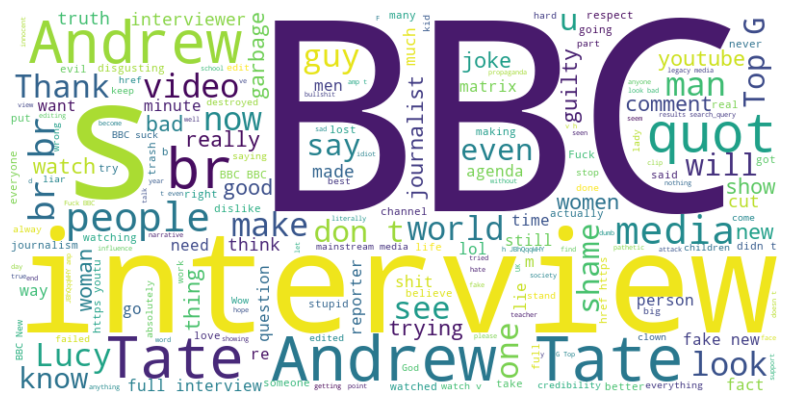

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(csv_file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("/Users/furqaankhan/Desktop/youtube_comments.csv")

    # Combine all comments into a single string
    all_comments = ' '.join(df['Comments'].tolist())

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

    # Display the WordCloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    csv_file_path = '/Users/furqaankhan/Desktop/youtube_comments.csv'  # Replace with the actual path to your CSV file
    generate_word_cloud(csv_file_path)


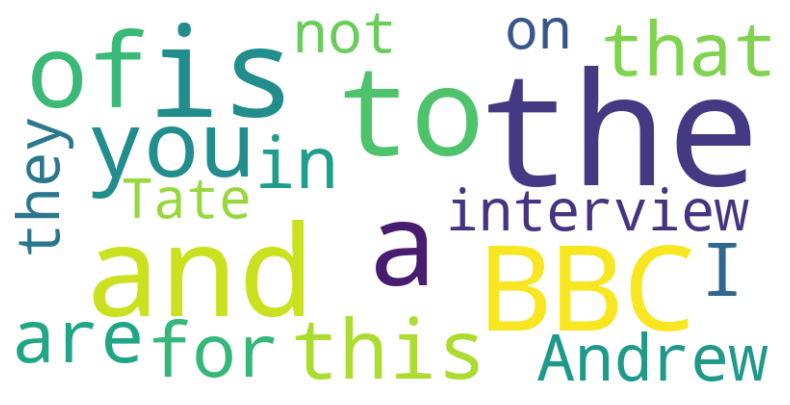

In [7]:
import pandas as pd
import csv
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

def extract_most_frequent_words(csv_file_path, num_words=20):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("/Users/furqaankhan/Desktop/youtube_comments.csv")

    # Combine all comments into a single string
    all_comments = ' '.join(df['Comments'].tolist())

    # Tokenize the comments (split into words)
    words = all_comments.split()

    # Count the frequency of each word
    word_freq = Counter(words)

    # Get the most frequent words
    most_common_words = word_freq.most_common(num_words)

    return most_common_words

def display_word_cloud(most_common_words):
    # Create a WordCloud object from the most frequent words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

    # Display the WordCloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def save_most_frequent_words_to_file(most_common_words, output_file_path):
    with open(output_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Word', 'Frequency'])
        for word, freq in most_common_words:
            writer.writerow([word, freq])

if __name__ == '__main__':
    csv_file_path = 'youtube_comments.csv'  # Replace with the actual path to your CSV file
    most_common_words = extract_most_frequent_words(csv_file_path, num_words=20)
    
    # Display the most frequent words as a word cloud
    display_word_cloud(most_common_words)

    # Save the most frequent words to a new CSV file on the desktop
    output_file_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'most_frequent_words.csv')
    save_most_frequent_words_to_file(most_common_words, output_file_path)


In [8]:
pip install nltk



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk

# Download the VADER lexicon data
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/furqaankhan/nltk_data...


True

In [34]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the CSV file with comments
df = pd.read_csv('/Users/furqaankhan/Desktop/youtube_comments.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis for the first 10 comments
for i, comment in enumerate(df['Comments'][:10]):
    sentiment_scores = analyzer.polarity_scores(comment)
    # sentiment_scores is a dictionary with 'compound', 'pos', 'neg', and 'neu' scores.
    # Here, 'compound' represents the overall sentiment, and 'pos' and 'neg' represent the positive and negative scores.

    print(f"Comment {i+1}:")
    print(comment)
    print('Sentiment Scores:', sentiment_scores)
    print('-' * 50)



Comment 1:
Legacy media are at the edge of death 💀
Sentiment Scores: {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.5994}
--------------------------------------------------
Comment 2:
Top g I’m going live tn unwrapping this entire thing
Sentiment Scores: {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.2023}
--------------------------------------------------
Comment 3:
Top G 🔥
Sentiment Scores: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}
--------------------------------------------------
Comment 4:
Tens of thousands of comments and not one is against tate. We stand with him
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------------------------------------
Comment 5:
Absolutely loaded questions disgusting behaviour from the bbc. The people who work for and with the bbc are sick sick human-beings who are the real monsters in this world.
Sentiment Scores: {'neg': 0.283, 'neu': 0.717, 'pos': 0.0, 'compound': -0.8824}
-----

In [11]:
pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


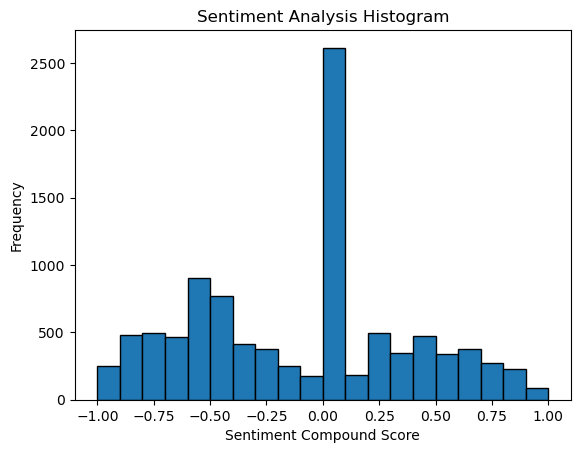

In [12]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the CSV file with comments
df = pd.read_csv('/Users/furqaankhan/Desktop/youtube_comments.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each comment
compound_scores = []
for comment in df['Comments']:
    sentiment_scores = analyzer.polarity_scores(comment)
    compound_scores.append(sentiment_scores['compound'])

# Create a histogram of the compound scores
plt.hist(compound_scores, bins=20, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Histogram')
plt.show()


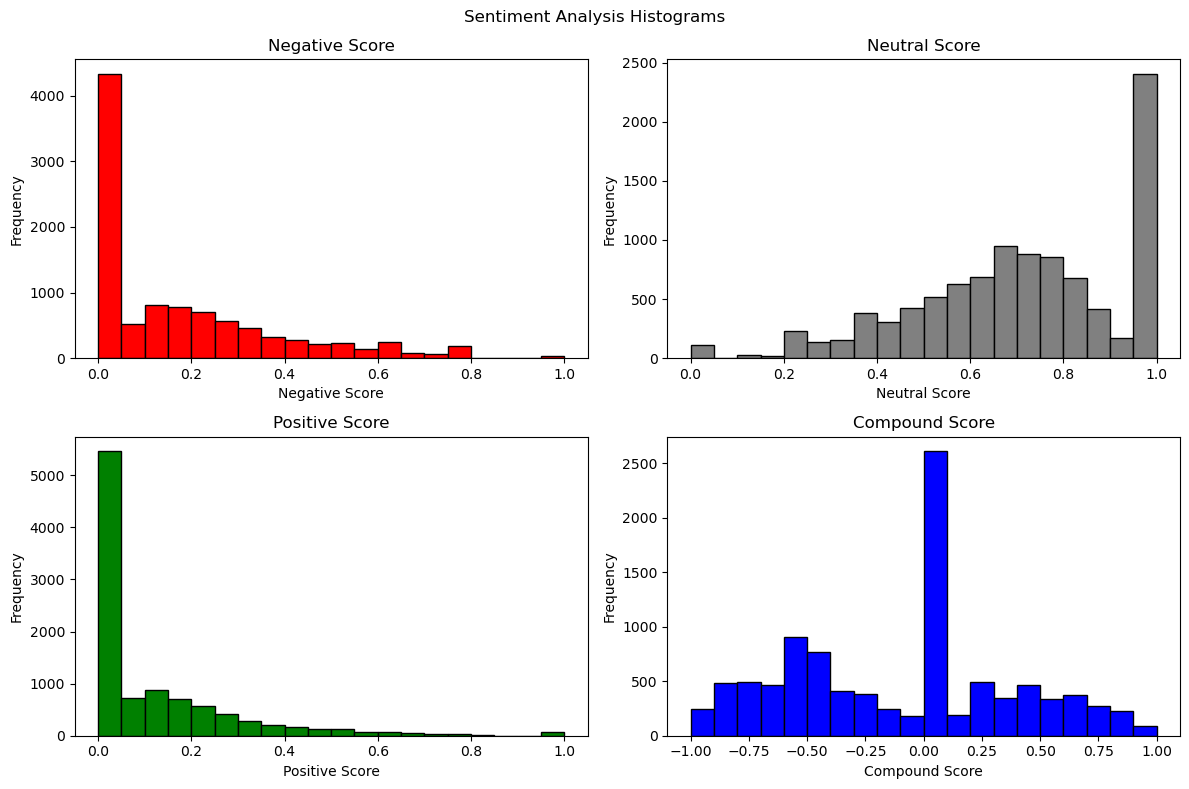

In [13]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the CSV file with comments
df = pd.read_csv('/Users/furqaankhan/Desktop/youtube_comments.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Lists to store sentiment scores
neg_scores = []
neu_scores = []
pos_scores = []
compound_scores = []

# Perform sentiment analysis for each comment
for comment in df['Comments']:
    sentiment_scores = analyzer.polarity_scores(comment)
    neg_scores.append(sentiment_scores['neg'])
    neu_scores.append(sentiment_scores['neu'])
    pos_scores.append(sentiment_scores['pos'])
    compound_scores.append(sentiment_scores['compound'])

# Create histograms for each sentiment score
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sentiment Analysis Histograms')

axes[0, 0].hist(neg_scores, bins=20, range=(0, 1), color='red', edgecolor='black')
axes[0, 0].set_title('Negative Score')
axes[0, 0].set_xlabel('Negative Score')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(neu_scores, bins=20, range=(0, 1), color='gray', edgecolor='black')
axes[0, 1].set_title('Neutral Score')
axes[0, 1].set_xlabel('Neutral Score')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(pos_scores, bins=20, range=(0, 1), color='green', edgecolor='black')
axes[1, 0].set_title('Positive Score')
axes[1, 0].set_xlabel('Positive Score')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(compound_scores, bins=20, range=(-1, 1), color='blue', edgecolor='black')
axes[1, 1].set_title('Compound Score')
axes[1, 1].set_xlabel('Compound Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


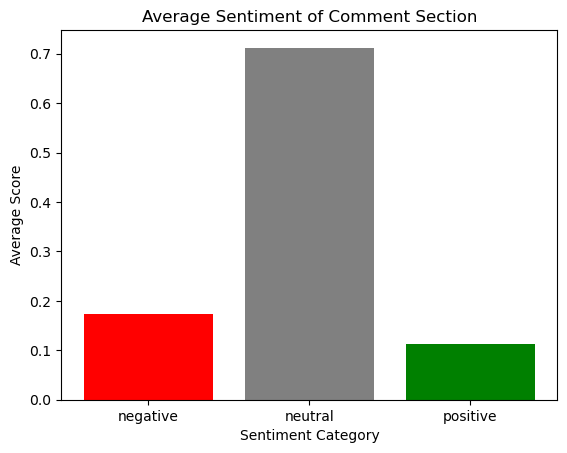

In [15]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the CSV file with comments
df = pd.read_csv('/Users/furqaankhan/Desktop/youtube_comments.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate average sentiment scores for each category
total_comments = len(df)
average_sentiment = {
    'negative': sum(df['Comments'].apply(lambda comment: analyzer.polarity_scores(comment)['neg'])) / total_comments,
    'neutral': sum(df['Comments'].apply(lambda comment: analyzer.polarity_scores(comment)['neu'])) / total_comments,
    'positive': sum(df['Comments'].apply(lambda comment: analyzer.polarity_scores(comment)['pos'])) / total_comments,
}

# Create a bar plot to visualize the average sentiment scores
plt.bar(average_sentiment.keys(), average_sentiment.values(), color=['red', 'gray', 'green'])
plt.xlabel('Sentiment Category')
plt.ylabel('Average Score')
plt.title('Average Sentiment of Comment Section')
plt.show()


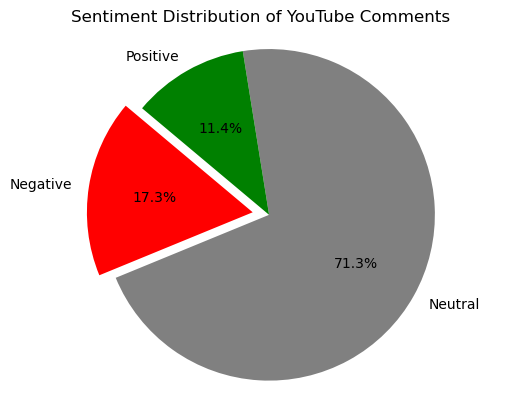

In [18]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the CSV file with comments
df = pd.read_csv('/Users/furqaankhan/Desktop/youtube_comments.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate average sentiment scores for each category
total_comments = len(df)
average_sentiment = {
    'negative': sum(df['Comments'].apply(lambda comment: analyzer.polarity_scores(comment)['neg'])) / total_comments,
    'neutral': sum(df['Comments'].apply(lambda comment: analyzer.polarity_scores(comment)['neu'])) / total_comments,
    'positive': sum(df['Comments'].apply(lambda comment: analyzer.polarity_scores(comment)['pos'])) / total_comments,
}

# Create a pie chart to visualize the sentiment distribution
labels = ['Negative', 'Neutral', 'Positive']
sizes = [average_sentiment['negative'], average_sentiment['neutral'], average_sentiment['positive']]
colors = ['red', 'gray', 'green']
explode = (0.1, 0, 0)  # To emphasize the 'Negative' slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution of YouTube Comments')
plt.show()


In [26]:
words = pd.read_csv("/Users/furqaankhan/Desktop/word_frequencies.csv")

In [27]:
words.head()

,Word,Frequency
0,BBC,4582
1,s,1217
2,interview,1136
3,Andrew Tate,976
4,Andrew,856


In [28]:
words.tail()

,Word,Frequency
10798,stolen,1
10799,cun7,1
10800,b1tch,1
10801,uglier,1
10802,peados,1
